# TensorFlow ile "Hello World" Modeli

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense ,BatchNormalization , Dropout

**Veri seti oluşturacağız**

In [ ]:
from sklearn.model_selection import train_test_split
x = np.array([-1.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0], dtype=float)
y = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0, 9.0, 11.0, 13.0, 15.0, 17.0], dtype=float)

x_train , x_test , y_train , y_test = train_test_split(x, y, test_size = 0.2 , random_state = 42)

print('Eğitim verisi :', x_train , y_train)
print('Test verisi : ', x_test , y_test)


Eğitim verisi : [9. 1. 0. 7. 3. 6. 2. 5.] [17.  1. -1. 13.  5. 11.  3.  9.]
Test verisi :  [ 4. -1.  8.] [ 7. -3. 15.]


**Basit bir yapay sinir ağı oluşturalım**

In [ ]:
# model = Sequential([
#     Dense(units=1, input_shape=[1],)  # Tek giriş ve tek nöron
# ])


**daha derin sinir ağı**

In [ ]:
# model = Sequential([
#     Dense(units=16, activation = 'relu' , input_shape=[1]),    #çok katmanlı yapay sinir ağı
#     Dense(units = 16 , activation= 'relu'),
#     Dense(units = 8 , activation= 'relu'),
#     Dense(units= 1)
# ])


**Drop Out ve Batch Normalizasyon ile**

In [ ]:
model = Sequential([
    Dense(units = 16, activation = 'relu', input_shape = [1]),
    BatchNormalization(), #girişteki verinin ölçeklenmesi
    Dropout(0.1),
    Dense(units=16, activation = 'relu'),
    BatchNormalization(),
    Dropout(0.1),
    Dense(units=8, activation = 'relu'),
    BatchNormalization(),
    Dropout(0.1),
    Dense(units=1 , activation = 'linear')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**Kayıp fonksiyonu ve optimizasyon algoritması** **Modelin derlenmesi**

In [ ]:
# model.compile(optimizer = 'adam', loss='mean_squared_error')

**RMSProp ile Optimizasyon**

In [ ]:
from tensorflow.keras.optimizers import RMSprop
model.compile(optimizer =RMSprop(learning_rate = 0.01), loss = 'mse')

**Modeli Eğitme ve Early Stop**

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor = 'val_loss' , patience =10 , restore_best_weights = True)

In [ ]:

history = model.fit(x_train, y_train, epochs=500, validation_data=(x_test, y_test), verbose=0, callbacks=[early_stop])

print("Eğitim tamamlandı")

Eğitim tamamlandı


In [ ]:
tahmin = model.predict(np.array([10.0]))  # NumPy dizisi olarak sağlıyoruz
print(tahmin)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step
[[17.32098]]


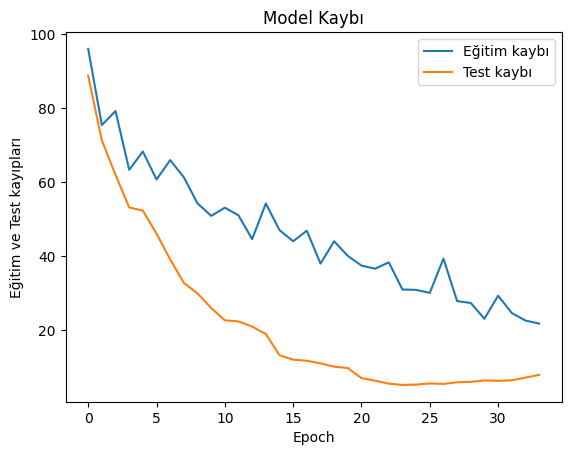

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'] , label = 'Eğitim kaybı')
plt.plot(history.history['val_loss'], label = 'Test kaybı')
plt.title('Model Kaybı')
plt.xlabel('Epoch')
plt.ylabel('Eğitim ve Test kayıpları')
plt.legend()
plt.show()

**Model Performansı değerlendirme**

In [ ]:
y_pred = model.predict(x_test)

#test sonuçları karşılaştırma
for i in range (len(x_test)):
  print(f"Gerçek olan : {y_test[i]}, Tahmin sonucunda bulunan : {y_pred[i]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step
Gerçek olan : 7.0, Tahmin sonucunda bulunan : [8.174858]
Gerçek olan : -3.0, Tahmin sonucunda bulunan : [0.7473439]
Gerçek olan : 15.0, Tahmin sonucunda bulunan : [14.272274]


# Fashion-MNIST


In [ ]:
from tensorflow.keras.datasets import fashion_mnist


In [ ]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
print("Eğitim verisinin boyutu: ", x_train.shape)
print("Test verisinin boyutu : ", x_test.shape)

Eğitim verisinin boyutu:  (60000, 28, 28)
Test verisinin boyutu :  (10000, 28, 28)


In [ ]:
class_names = ['Tişört/Üst', 'Pantolon', 'Kazak', 'Elbise', 'Ceket',
               'Sandalet', 'Gömlek', 'Spor Ayakkabı', 'Çanta', 'Bilekte Bot']

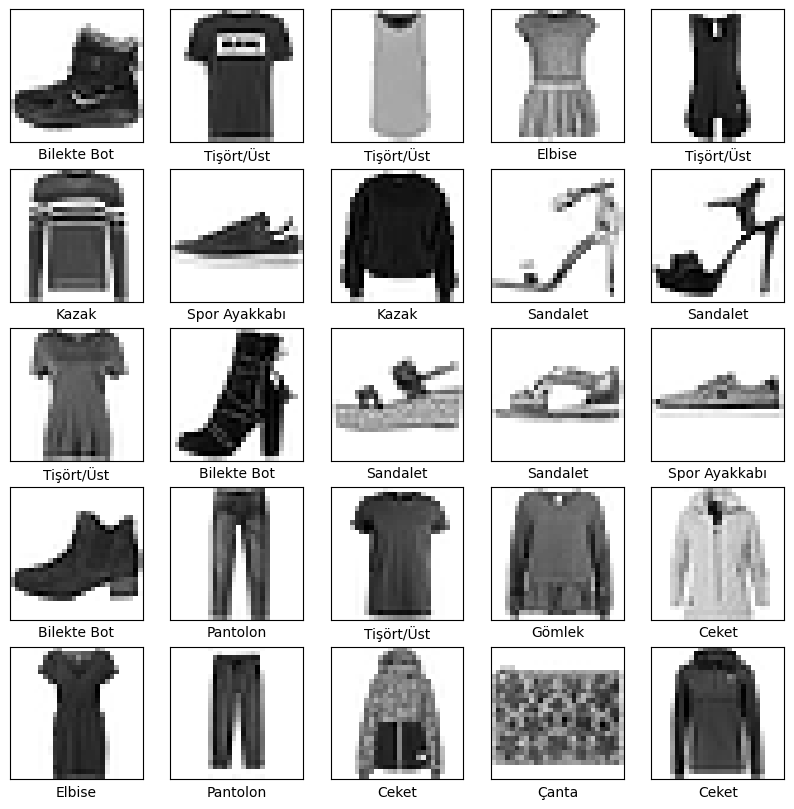

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_train[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[y_train[i]])
plt.show()

**Verinin normalize edilmesi gerekiyor**

In [ ]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [ ]:
x_train = x_train.reshape(-1, 28, 28, 1)   #CNN verileri 4D formatında bekliyor bu yüzden 2 boyutlu olan resim verilerini 4 boyuta çekiyoruz
x_test = x_test.reshape(-1, 28, 28, 1)   #buradaki -1 = sen hesapla kaç tane görüntü var demek yani yerine bu örnekte 1000 geliyor

# CNN Modelini Oluşturma

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten,Dense , Dropout

In [ ]:
model = Sequential([
    Conv2D(32, (3,3) , activation = 'relu', input_shape = (28,28,1)), #32 adet filtre kullanıyor
    #her filtre boyutu 3x3 giriş boyutu ise (28x28x1)
    MaxPooling2D((2,2)), #görüntünü boyutlarını küçültmek ve anlamlı özellikleri korumak için maxpool
    Dropout(0.2),
    Conv2D(64, (3,3), activation = 'relu'), #diğer conv. katmanımız 64 filtre kullanıyor 3x3 boyutunda
    MaxPooling2D((2,2)), #tekrardan boyut küçültüyoruz
    Dropout(0.2),
    Flatten(), #düzleştirme örneğin 5x5x64 olsun = 1600 (5*5*64) elemanlı bir vektör oldu artık diğer katmanımıza verebiliriz
    Dense(128, activation = 'relu'), #bu katman tam bağlantılı katman,
    #Bir sinir ağı modeli, Dense katmanları kullanarak öğrendiği özellikleri birleştirir
    #Her nöron, bir önceki katmandaki Flatten katmanından gelen tüm girdilerle bağlantılıdır.
     BatchNormalization(),
     Dropout(0.2),
     Dense(10, activation = 'softmax') #10 sınıf olduğu için 10 çıkışımız var
])

**Sinir ağımızı oluşturduk sıra modeli derlemede**

In [ ]:
# model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

# history = model.fit(x_train, y_train, epochs =35, validation_data=(x_test, y_test))

**Test performansını görselleştirelim**

In [ ]:
# from matplotlib import pyplot as plt
# plt.plot(history.history['accuracy'], label = 'Eğitim doğruluğu')
# plt.plot(history.history['val_accuracy'], label = 'Test doğruluğu')
# plt.title('Model Doğruluğu')
# plt.xlabel('Epoch')
# plt.ylabel('Eğitim ve Test doğruluğu')
# plt.legend()
# plt.show()

**Test veri setinden bir örneği tahmin edelim**

In [ ]:
# test_image = x_test[8]
# prediction = model.predict(np.array([test_image]))
# print("Tahmin", np.argmax(prediction))
# print("Gerçek", y_test[0])

In [ ]:
# import matplotlib.pyplot as plt
# plt.imshow(test_image.reshape(28,28), cmap= 'gray')
# plt.title(f"Tahmin: {np.argmax(prediction)} | Gerçek :{y_test[8]}")
# plt.axis('off')
# plt.show()

# Transfer Learning

 Daha önce büyük bir veri seti üzerinde eğitilmiş bir modeli (örneğin ResNet veya VGG16) alıp kendi veri setimiz üzerinde özelleştirme (fine-tuning) yapma sürecidir.

### CIFAR-10 renkli ve daha karmaşık bir veri seti

In [ ]:
from tensorflow.keras.datasets import cifar10

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 14s 0us/step


# İmage artırma yapıyorum

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range =15,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    horizontal_flip = True,
)

datagen.fit(x_train)

In [ ]:
class_names = ['Uçak', 'Araba', 'Kuş', 'Kedi', 'Geyik', 'Köpek', 'Kurbağa', 'At', 'Gemi', 'Kamyon']


Birkaç görtüntüye bakalım nasılmış

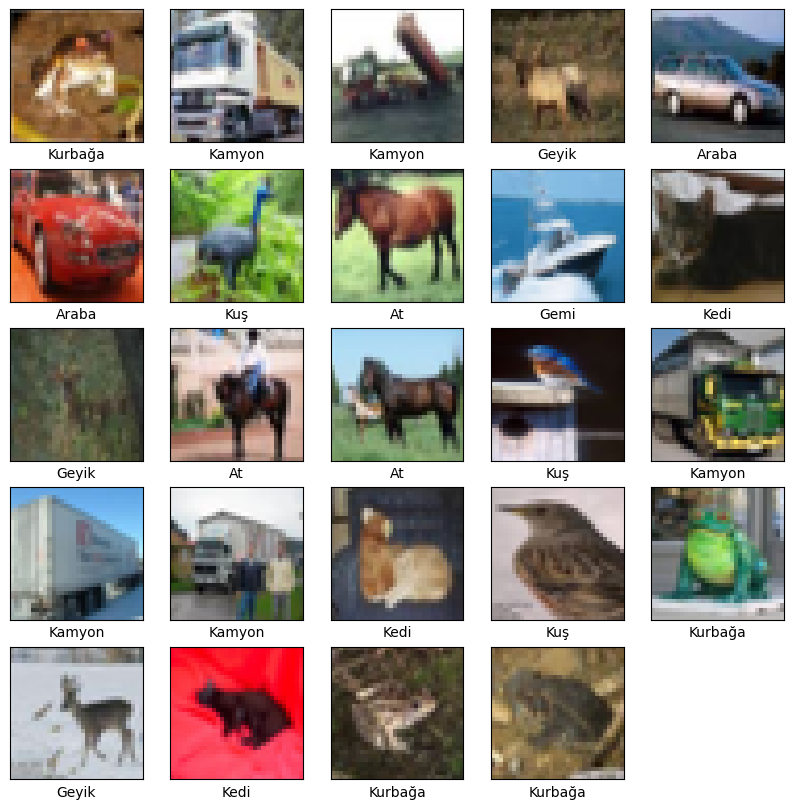

In [ ]:
from matplotlib import pyplot as plt

plt.figure(figsize=(10,10))
for i in range(24):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_train[i])
  plt.xlabel(class_names[y_train[i][0]])
plt.show()

# Önceden Eğitilmiş Modeli Yükleme

ResNet50 Modelini kullanacağız

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, Dropout, Flatten

Önceden eğitilmiş Resnet modelini ekliyorum

In [ ]:
# base_model = ResNet50(weights ='imagenet', include_top = False, input_shape = (32,32,3))


**Model Oluşturma**

In [ ]:
# model = Sequential([
#     base_model,
#     Flatten(),
#     Dense(128, activation = 'relu'),
#     Dropout(0.2),
#     Dense(256, activation='relu'),
#     Dropout(0.2),
#     Dense(10, activation = 'softmax')
# ])

# Modeli Dondurma

In [ ]:
# base_model.trainable = True
# for layer in base_model.layers[:-10]:
#   layer.trainable = False

**Earyl stop deneyeceğim**

**Modeli derleme ve optimizasyon ayarlamaları adam kullanacağız**

In [ ]:
# model.compile(optimizer = 'Adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
# from tensorflow.keras.callbacks import EarlyStopping
# early_stop = EarlyStopping(monitor = 'val_loss', patience = 5, restore_best_weights=True)

In [ ]:
#modeli eğitme
# history = model.fit(x_train, y_train, epochs = 15 , validation_data = (x_test, y_test))

**Doğruluk Grafiği**

In [ ]:
# plt.plot(history.history['accuracy'], label = 'Eğitim doğruluğu')
# plt.plot(history.history['val_accuracy'], label = 'Test doğruluğu')
# plt.title('Model Doğruluğu')
# plt.xlabel('Epoch')
# plt.ylabel('Eğitim ve Test Doğruluğu')
# plt.legend()
# plt.show()


# TRANSFER LEARNİNG DEVAM MobileNetV2 ve EfficientNetB0

**önce MobileNetV2 ile başlayalım**

In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications import EfficientNetB0

In [ ]:
base_model = MobileNetV2(weights ='imagenet', include_top = False, input_shape = (32,32,3))

<ipython-input-40-60bbcc9d298b>:1: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights ='imagenet', include_top = False, input_shape = (32,32,3))


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

In [ ]:
#şimdi katmanları donduracağım
base_model.trainable = True
for layer in base_model.layers[:-10]:
  layer.trainable = False


**Modelin üst katmanlarını oluşturalım**

In [ ]:
model = Sequential([
    base_model,
    Flatten(),
    Dense(128, activation = 'relu'),
    Dropout(0.2),
    Dense(256, activation ='relu'),
    Dropout(0.2),
    Dense(10, activation = 'softmax')
])

In [ ]:
model.compile(optimizer = 'Adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
history = model.fit(datagen.flow(x_train, y_train), batch_size=32, epochs= 15, validation_data=(x_test, y_test))

Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 70s 32ms/step - accuracy: 0.3980 - loss: 1.6912 - val_accuracy: 0.5522 - val_loss: 1.3066
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 21ms/step - accuracy: 0.5113 - loss: 1.4028 - val_accuracy: 0.5806 - val_loss: 1.1963
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 20ms/step - accuracy: 0.5300 - loss: 1.3475 - val_accuracy: 0.5845 - val_loss: 1.2069
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.5474 - loss: 1.3072 - val_accuracy: 0.5918 - val_loss: 1.1765
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 21ms/step - accuracy: 0.5478 - loss: 1.3024 - val_accuracy: 0.6013 - val_loss: 1.1448
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.5578 - loss: 1.2682 - val_accuracy: 0.5524 - val_loss: 1.2412
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.5584 - loss: 1.2656 - val_accuracy: 0.6154 - val_loss: 1.1102
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.5667 - loss: 1.24

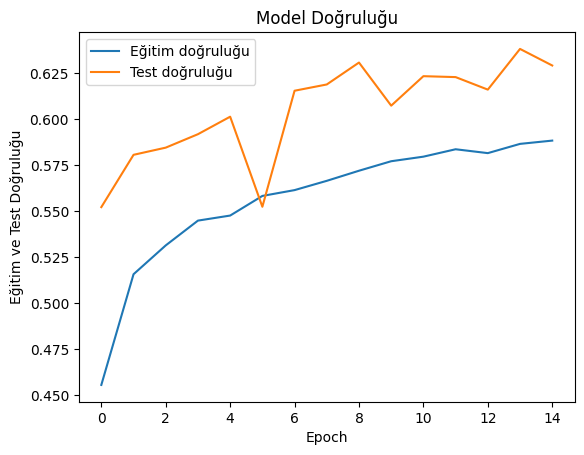

In [ ]:
plt.plot(history.history['accuracy'], label = 'Eğitim doğruluğu')
plt.plot(history.history['val_accuracy'], label = 'Test doğruluğu')
plt.title('Model Doğruluğu')

plt.xlabel('Epoch')
plt.ylabel('Eğitim ve Test Doğruluğu')
plt.legend()
plt.show()

**sonuçlar istediğim gibi değil neden böyle oluyor anlamıyorum neyse şimdi tahmin yapacağız**

In [ ]:
test_index = 81
test_image = x_test[test_index]
test_label = y_test[test_index]

prediction = model.predict(np.array([test_image]))
predict_label = np.argmax(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


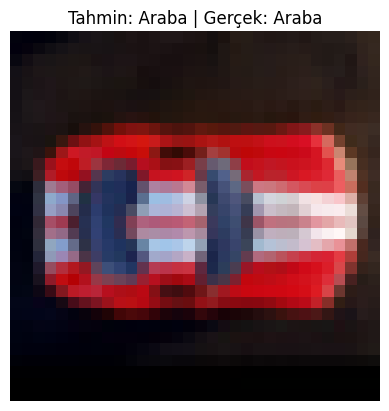

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(test_image)
plt.title(f"Tahmin: {class_names[predict_label]} | Gerçek: {class_names[test_label[0]]}")
plt.axis('off')
plt.show()

# Görüntü Okuma ve Görselleştirme




OpenCV kullanacağız

In [ ]:
import cv2
import matplotlib.pyplot as plt

In [ ]:
#önce görüntüyü yükleyelim
image = cv2.imread('team.jpg')

In [ ]:
#görüntüyü farklı renk formatlarında görelim
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

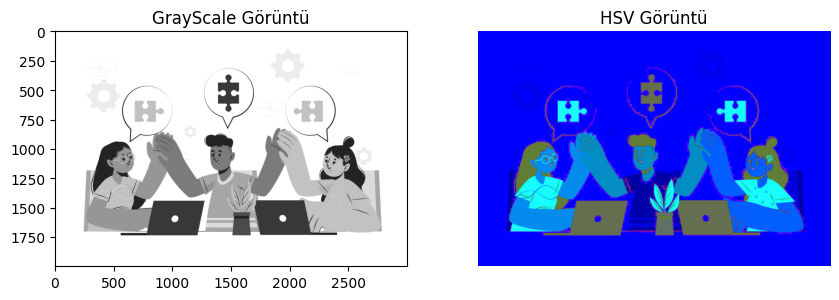

In [ ]:
#görüntüleri görmek için
plt.figure(figsize = (10, 5))
plt.subplot(1,2,1)
plt.title("GrayScale Görüntü")
plt.imshow(gray_image, cmap = 'gray')
plt.subplot(1,2,2)
plt.title("HSV Görüntü")
plt.imshow(hsv_image)
plt.axis('off')
plt.show()


## Görüntü Bulanıklaştırma

Görüntüyü bulanıklaştırmak, gürültüyü azaltmak ve kenar tespiti gibi işlemler için bir hazırlık adımıdır.

In [ ]:
blurred_image = cv2.GaussianBlur(image, (15,15),  sigmaX=5)

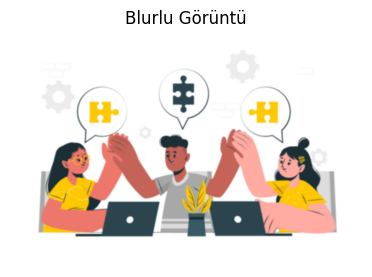

In [ ]:
#şimdi blurlaşan görüntüyü görelim
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
plt.title("Blurlu Görüntü")
plt.imshow(cv2.cvtColor(blurred_image, cv2.COLOR_BGR2RGB)) #bu şekilde ana renkleri görecek
#Matplotlib, görüntüleri RGB (Red-Green-Blue) formatında bekler
#OpenCV, varsayılan olarak görüntüleri BGR (Blue-Green-Red) formatında okur.
#bundan dolayı resmi mavi görüyorduk
#plt.imshow(blurred_image, cmap = 'gray') : eski kod
plt.axis('off')
plt.show()

## Kenar Tespiti (Canny Edge Detection)

In [ ]:
edges = cv2.Canny(image, 100, 200)

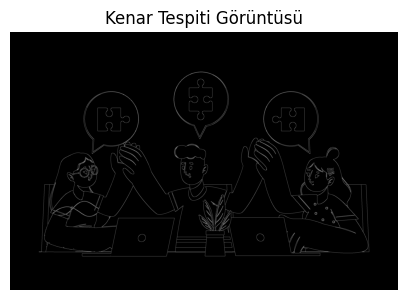

In [ ]:
#görselleştirelim
plt.figure(figsize = (5,5))
plt.title("Kenar Tespiti Görüntüsü")
plt.imshow(edges, cmap = 'gray')
plt.axis('off')
plt.show()

## Görüntüyü Döndürme

In [ ]:
(h,w)= gray_image.shape[:2]
center = (w//2, h//2)
matrix = cv2.getRotationMatrix2D(center, 45, 1.0) #45 derece döndürmek için
rotated_image = cv2.warpAffine(gray_image, matrix, (w,h))

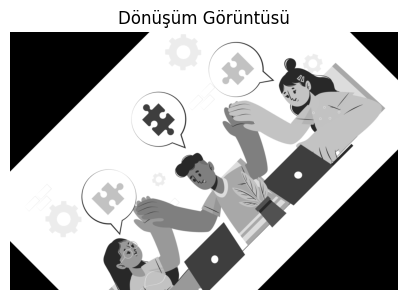

In [ ]:
#görsel olarak:
plt.figure(figsize = (5,5))
plt.title("Dönüşüm Görüntüsü")
plt.imshow(rotated_image, cmap = 'gray')
plt.axis('off')
plt.show()

# Histogram Eşitleme

Histogram eşitleme, görüntüdeki kontrastı artırmak için kullanılan bir yöntemdir. Özellikle zayıf aydınlatılmış veya düşük kontrastlı görüntülerde, detayları öne çıkarmak için idealdir.

## Adım 1: Histogram Çıkarma

Histogram, bir görüntüdeki farklı parlaklık seviyelerinin (örneğin, 0-255 arasındaki piksel değerlerinin) dağılımını gösterir.

## Adım 2: Histogram Eşitleme

Histogram eşitlemesi, bir görüntünün piksel değerlerini yeniden dağıtarak kontrastı artırır.

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
image = cv2.imread('team.jpg', cv2.IMREAD_GRAYSCALE)   #resmi gri olarak yüklüyorum önce

In [ ]:
#histogram eşitleme
equalized_image = cv2.equalizeHist(image)  #detay önce çıkarmak için

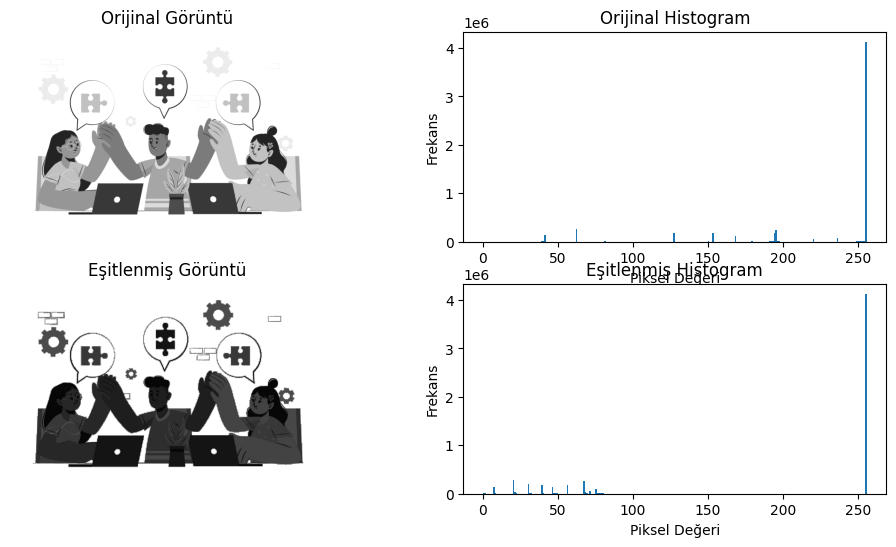

In [ ]:
#şimdi orijinal resme bakalım
plt.figure(figsize = (12,6))
plt.subplot(2,2,1)
plt.title("Orijinal Görüntü")
plt.imshow(image, cmap = 'gray')
plt.axis('off')


plt.subplot(2,2,2)
plt.title("Orijinal Histogram")
plt.hist(image.ravel(), 256, [0,256])
plt.xlabel('Piksel Değeri')
plt.ylabel('Frekans')

#Eşitlenmiş Histogram
plt.subplot(2,2,3)
plt.title("Eşitlenmiş Görüntü")
plt.imshow(equalized_image, cmap = 'gray')
plt.axis('off')

plt.subplot(2,2,4)
plt.title("Eşitlenmiş Histogram")
plt.hist(equalized_image.ravel(), 256, [0,256])
plt.xlabel('Piksel Değeri')
plt.ylabel('Frekans')
plt.show()





### Düşük Kontrastlı Görüntü İle Çalışmak

In [ ]:
low_contrast_image = cv2.imread('düşükkontrast.jpg', cv2.IMREAD_GRAYSCALE)

In [ ]:
#Histogram Eşitleme
equalized_image = cv2.equalizeHist(low_contrast_image)

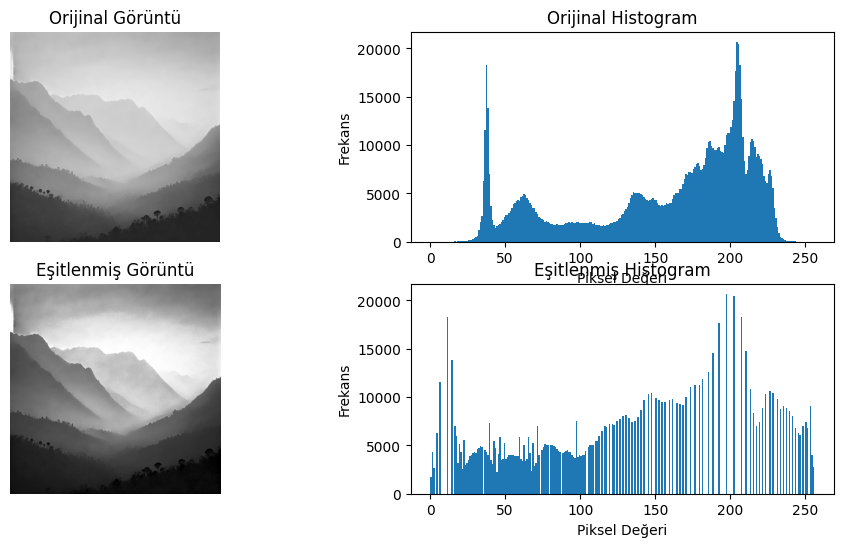

<Figure size 640x480 with 0 Axes>

In [ ]:
#önce orijinal resmi görelim
plt.figure(figsize = (12,6))
plt.subplot(2,2,1)
plt.title("Orijinal Görüntü")
plt.imshow(low_contrast_image, cmap = 'gray')
plt.axis('off')

plt.subplot(2,2,2)
plt.title("Orijinal Histogram")
plt.hist(low_contrast_image.ravel(), 256, [0,256])
plt.xlabel('Piksel Değeri')
plt.ylabel('Frekans')

plt.subplot(2,2,3)
plt.title("Eşitlenmiş Görüntü")
plt.imshow(equalized_image, cmap = 'gray')
plt.axis('off')

plt.subplot(2,2,4)
plt.title("Eşitlenmiş Histogram")
plt.hist(equalized_image.ravel(), 256, [0,256])
plt.xlabel('Piksel Değeri')
plt.ylabel('Frekans')
plt.show()

plt.tight_layout()
plt.show()

# Görüntü Segmentasyonu

Segmentasyon, bir görüntüyü anlamlı bölgelere ayırma işlemidir. Örneğin:
Arka planı ve ön planı ayırmak.
Nesneleri belirlemek.


## Segmentasyon ile Çalışma: Otsu Thresholding

Otsu Thresholding, görüntüyü iki bölgeye (örneğin, nesne ve arka plan) ayırmak için kullanılan bir yöntemdir.

In [ ]:
import cv2
import matplotlib.pyplot as plt


In [ ]:
image =  cv2.imread('düşükkontrast.jpg', cv2.IMREAD_GRAYSCALE)

In [ ]:
# Otsu Thresholding uygulama
_, threshold = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

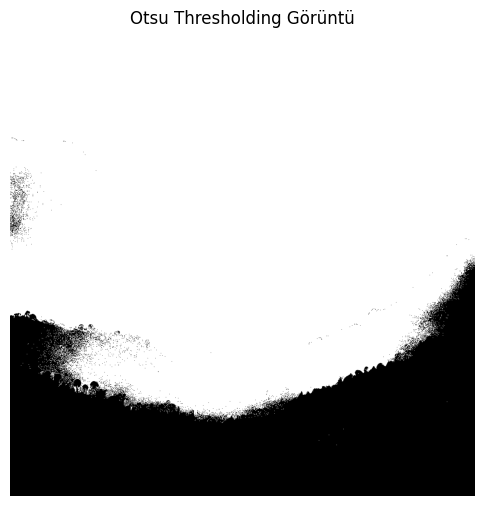

In [ ]:
#Şimdi görselleştirelim
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
plt.title("Orijinal Görüntü")
plt.imshow(image, cmap = 'gray')
plt.axis('off')

plt.subplot(1,2,1)
plt.title("Otsu Thresholding Görüntü")
plt.imshow(threshold, cmap = 'gray')
plt.axis('off')

plt.tight_layout()
plt.show()

## Adaptive Thresholding

Adaptive Thresholding, görüntüyü bölgelere ayırarak her bölge için ayrı eşik değerleri hesaplar. Bu yöntem, aydınlatmanın eşit olmadığı (örneğin, bazı yerler karanlık, bazı yerler parlak) görüntülerde daha iyi sonuç verir.

In [ ]:
import cv2
import matplotlib.pyplot as plt

In [ ]:
#resmi yükleyelim
image = cv2.imread('düşükkontrast.jpg', cv2.IMREAD_GRAYSCALE)

In [ ]:
# Adaptive Thresholding uygulama
adaptive_thresh_mean = cv2.adaptiveThreshold(
    image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2
)
adaptive_thresh_gaussian = cv2.adaptiveThreshold(
    image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2
)

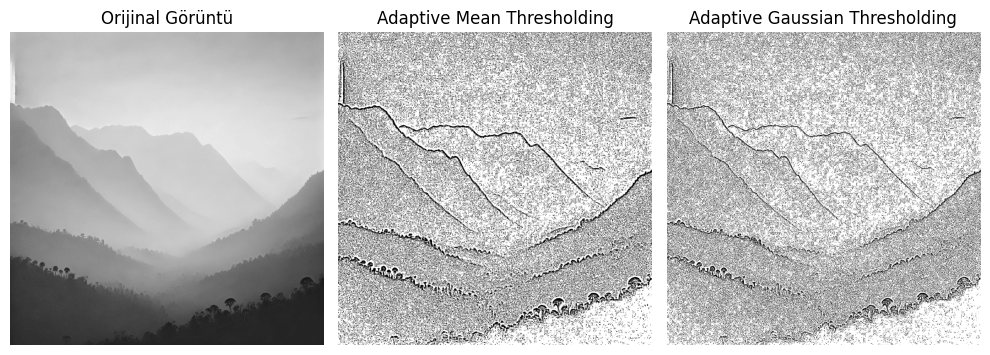

In [ ]:
#Görselleştirme

plt.figure(figsize = (10,5))
plt.subplot(1,3,1)
plt.title("Orijinal Görüntü")
plt.imshow(image, cmap = 'gray')
plt.axis('off')

plt.subplot(1,3,2)
plt.title("Adaptive Mean Thresholding")
plt.imshow(adaptive_thresh_mean, cmap = 'gray')
plt.axis('off')

plt.subplot(1,3,3)
plt.title("Adaptive Gaussian Thresholding")
plt.imshow(adaptive_thresh_gaussian, cmap = 'gray')
plt.axis('off')


plt.tight_layout()
plt.show()

## K-Means Clustering ile Segmentasyon

Şimdi renk veya gri ton değerlerine göre görüntüyü K-Means Clustering ile bölgelere ayıracağız.

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#resmi yükleyelim
image = cv2.imread('düşükkontrast.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [ ]:
#görüntüyü yeniden şekillendiriyoruz
pixel_values = image.reshape((-1,3))
pixel_values = np.float32(pixel_values)

In [ ]:
#k means için parametreleri belirleyelim
k = 5
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
_, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

#Merkez ve etiketlerin yeniden şekillendirilmesi
centers = np.uint8(centers)
segmented_image = centers[labels.flatten()]
segmented_image = segmented_image.reshape(image.shape)



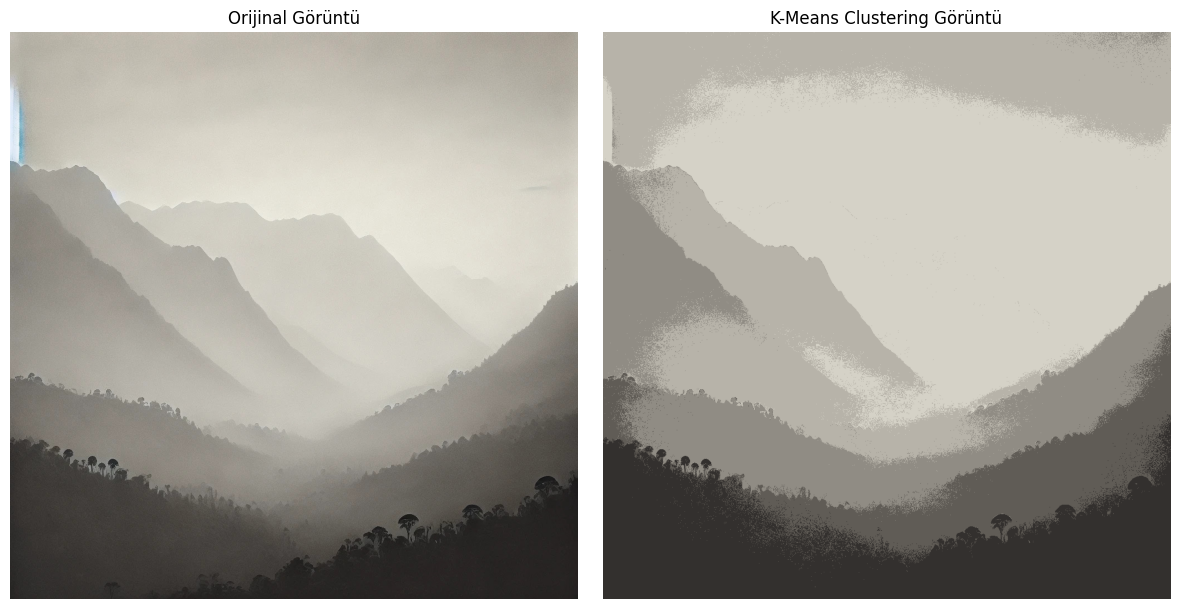

In [ ]:
#Görselleştirme
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plt.title("Orijinal Görüntü")
plt.imshow(image)
plt.axis('off')

plt.subplot(1,2,2)
plt.title("K-Means Clustering Görüntü")
plt.imshow(segmented_image)
plt.axis('off')

plt.tight_layout()
plt.show()



## Contour Detection

Kontur tespiti, bir görüntüdeki nesnelerin sınırlarını bulma işlemidir. Bu işlem, genellikle kenar tespit algoritmaları (Canny gibi) ile birlikte kullanılır.

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
image = cv2.imread('düşükkontrast.jpg', cv2.IMREAD_GRAYSCALE)


In [ ]:
#Kenar tespiti
blurred_image = cv2.GaussianBlur(image, (5,5), 0)
edges = cv2.Canny(image, 50, 150)

In [ ]:
#Kontur Tespiti
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [ ]:
#kontur çizme
image_with_contours = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)  # Görüntüyü renkli formata çevir
cv2.drawContours(image_with_contours, contours, -1, (0, 255, 0), 2)


array([[[194, 194, 194],
        [192, 192, 192],
        [191, 191, 191],
        ...,
        [165, 165, 165],
        [177, 177, 177],
        [180, 180, 180]],

       [[192, 192, 192],
        [191, 191, 191],
        [189, 189, 189],
        ...,
        [169, 169, 169],
        [163, 163, 163],
        [168, 168, 168]],

       [[190, 190, 190],
        [188, 188, 188],
        [186, 186, 186],
        ...,
        [168, 168, 168],
        [163, 163, 163],
        [170, 170, 170]],

       ...,

       [[ 39,  39,  39],
        [ 37,  37,  37],
        [ 35,  35,  35],
        ...,
        [ 31,  31,  31],
        [ 31,  31,  31],
        [ 31,  31,  31]],

       [[ 35,  35,  35],
        [ 36,  36,  36],
        [ 37,  37,  37],
        ...,
        [ 31,  31,  31],
        [ 31,  31,  31],
        [ 31,  31,  31]],

       [[ 32,  32,  32],
        [ 36,  36,  36],
        [ 39,  39,  39],
        ...,
        [ 31,  31,  31],
        [ 31,  31,  31],
        [ 31,  31,  31]]

<ipython-input-70-59e252d71548>:19: UserWarning: tight_layout not applied: number of columns in subplot specifications must be multiples of one another.
  plt.tight_layout()


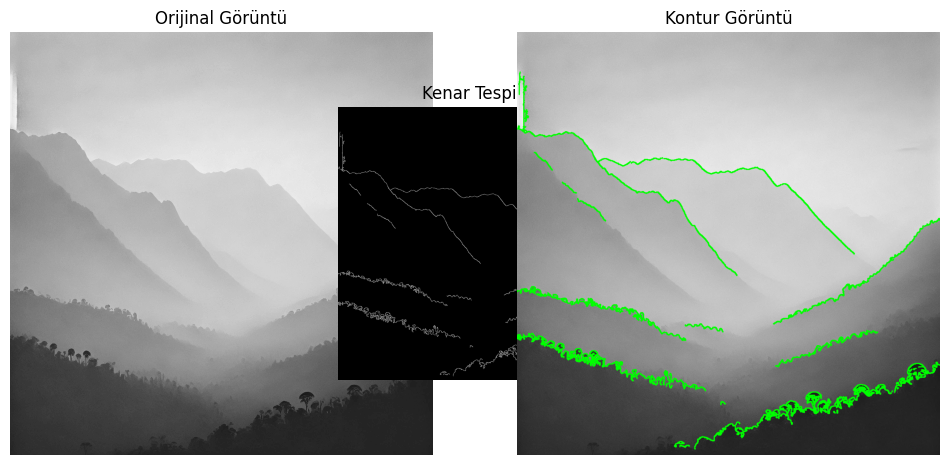

In [ ]:
#Görselleştirelim
plt.figure(figsize = (12,6))

plt.subplot(1,2,1)
plt.title("Orijinal Görüntü")
plt.imshow(image, cmap = 'gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Kenar Tespiti")
plt.imshow(edges, cmap='gray')
plt.axis('off')

plt.subplot(1,2,2)
plt.title("Kontur Görüntü")
plt.imshow(cv2.cvtColor(image_with_contours, cv2.COLOR_RGB2BGR))
plt.axis('off')

plt.tight_layout()
plt.show()

# Kontur Özellikleri ve Etiketleme

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#resmi yükleyelim
image = cv2.imread('kare.jpg', cv2.IMREAD_GRAYSCALE)

In [ ]:
#Kenar Tespiti
edges = cv2.Canny(image, 50, 150)

In [ ]:
#Kontur Tespiti
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

#Konturleri çizmek için renkli görüntü
image_with_contours = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)


In [ ]:
for contour in contours:
    area = cv2.contourArea(contour)
    if area > 10:  # Daha küçük alanları da dahil etmek için
        perimeter = cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, 0.03 * perimeter, True)
        num_vertices = len(approx)

        # Şekil tanıma
        if num_vertices == 3:
            shape_name = "Üçgen"
        elif num_vertices == 4:
            shape_name = "Dörtgen"
        elif num_vertices == 5:
            shape_name = "Pentagon"
        elif num_vertices == 6:
            shape_name = "daire"
        else:
            shape_name = "Bilinmeyen Şekil"

        # Kontur çiz
        cv2.drawContours(image_with_contours, [contour], -1, (0, 255, 0), 2)

        # Şekil ismini yaz
        x, y, w, h = cv2.boundingRect(contour)
        cv2.putText(image_with_contours, shape_name, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 2)


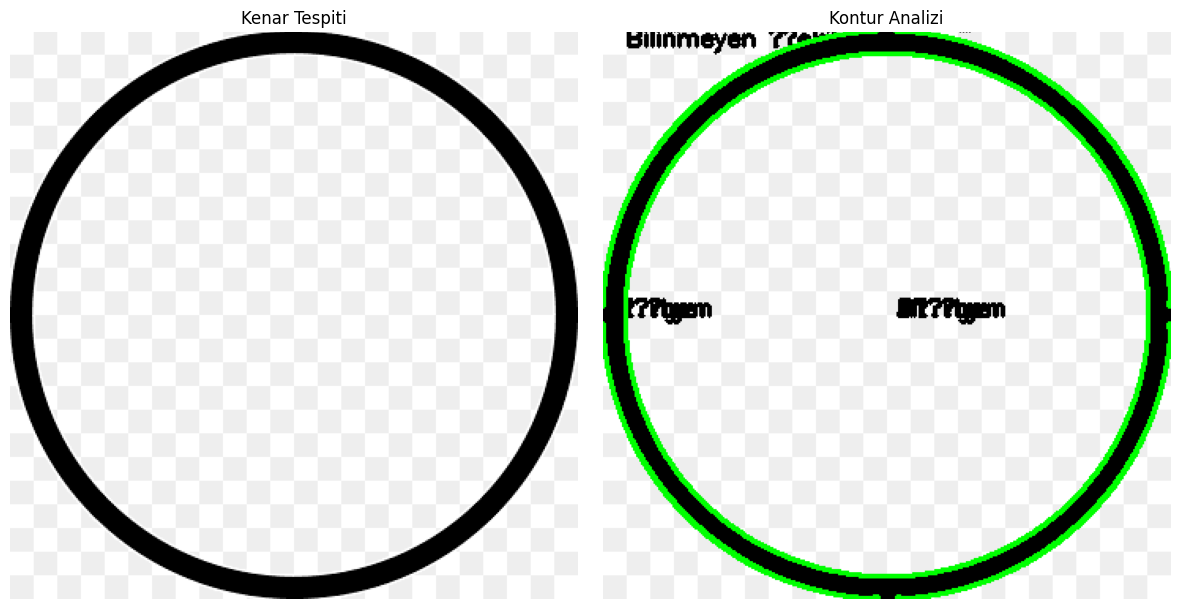

In [ ]:
#Görselleştirme
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plt.title("Kenar Tespiti")
plt.imshow(image, cmap = 'gray')
plt.axis('off')

plt.subplot(1,2,2)
plt.title("Kontur Analizi")
plt.imshow(cv2.cvtColor(image_with_contours, cv2.COLOR_RGB2BGR))
plt.axis('off')

plt.tight_layout()
plt.show()

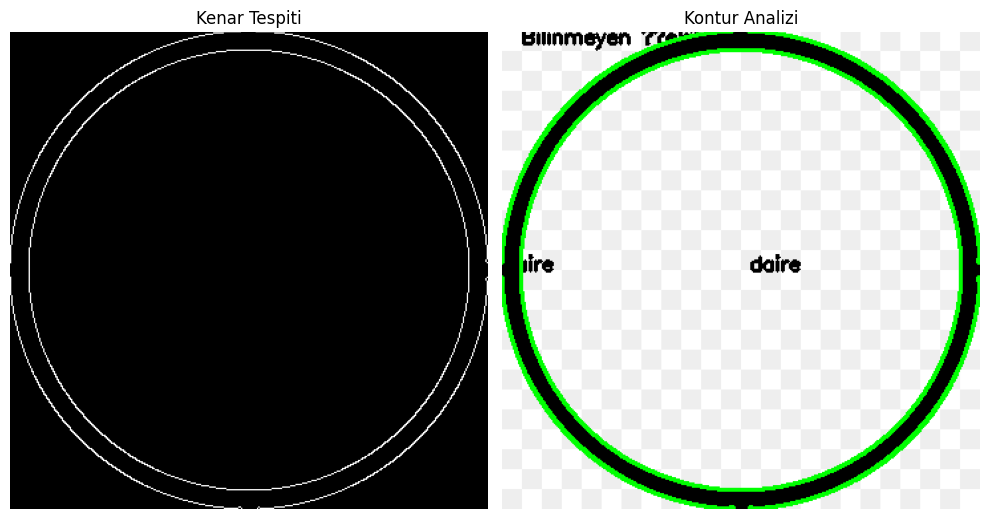

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Kare resmini yükle
image = cv2.imread('daire.png', cv2.IMREAD_GRAYSCALE)

# Kenar tespiti (Canny)
edges = cv2.Canny(image, 50, 150)

# Kontur tespiti
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Renkli görüntü
image_with_contours = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

# Kontur özelliklerini analiz et
for contour in contours:
    area = cv2.contourArea(contour)
    if area > 10:  # Daha küçük alanları da dahil etmek için
        perimeter = cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, 0.02 * perimeter, True)
        num_vertices = len(approx)

        # Şekil tanıma
        if num_vertices == 3:
            shape_name = "Üçgen"
        elif num_vertices == 4:
            shape_name = "Dörtgen"
        elif num_vertices == 5:
            shape_name = "Pentagon"
        elif num_vertices == 6:
            shape_name = "daire"
        else:
            shape_name = "Bilinmeyen Şekil"

        # Kontur çiz
        cv2.drawContours(image_with_contours, [contour], -1, (0, 255, 0), 2)

        # Şekil ismini yaz
        x, y, w, h = cv2.boundingRect(contour)
        cv2.putText(image_with_contours, shape_name, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 2)

# Görselleştirme
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.title("Kenar Tespiti")
plt.imshow(edges, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Kontur Analizi")
plt.imshow(cv2.cvtColor(image_with_contours, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.tight_layout()
plt.show()


# Görüntü Segmentasyonu (K-means ile)

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#resim yükleyelim
image = cv2.imread('düşükkontrast.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [ ]:
#Görüntüyü 2D arraya dönüştürelim
pixel_values = image.reshape((-1,3))
pixel_values = np.float32(pixel_values)

In [ ]:
# Merkezleri (renkleri) uint8 formatına dönüştür
centers = np.uint8(centers)
labels = labels.flatten()

In [ ]:
# Segmentlenmiş görüntüyü yeniden oluştur
segmented_image = centers[labels.flatten()]
segmented_image = segmented_image.reshape(image.shape)

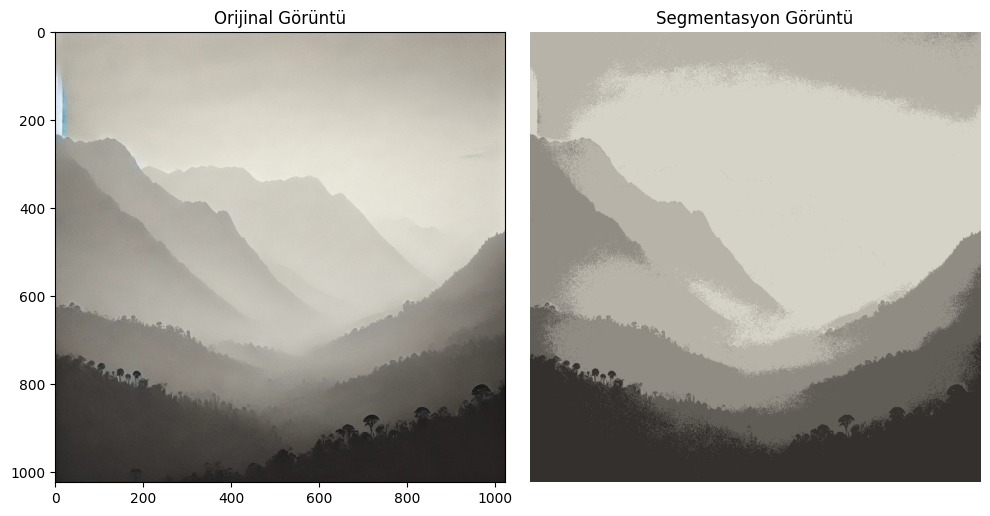

In [ ]:
# Orijinal ve Segmentlenmiş Görüntüyü Görselleştir
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("Orijinal Görüntü")
plt.imshow(image)
plt

plt.subplot(1,2,2)
plt.title("Segmentasyon Görüntü")
plt.imshow(segmented_image)
plt.axis('off')

plt.tight_layout()
plt.show()


# Projemiz: Şablon Bulma (Template Matching)


Bir logo, bir simge ya da bir nesneyi büyük bir resim içinde aramak istiyoruz. Bu işlem, yüz tanıma sistemlerinde, logoları tespit etmekte ya da sahtekarlık tespitlerinde sıkça kullanılır.

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#görüntüleri yükleyelim
main_image = cv2.imread('masaüstü.jpg', cv2.IMREAD_UNCHANGED)
template = cv2.imread('valorant.jpg', cv2.IMREAD_UNCHANGED)

In [ ]:
# template = cv2.resize(template, (50, 50))

In [ ]:
#şablonun boyutları
# w, h = template.shape[::-1]

In [ ]:
#Template Matching işlemi
result = cv2.matchTemplate(main_image, template, cv2.TM_CCOEFF_NORMED)
threshold = 0.8
loc = np.where(result >= threshold)

In [ ]:
# Şablonun bulunduğu yerleri ana görüntüde işaretleme
for pt in zip(*loc[::-1]):
    cv2.rectangle(main_image, pt, (pt[0] + w, pt[1] + h), (0, 255, 0), 2)